In [1]:
import numpy as np  
from scipy.linalg import solve
import matplotlib.pyplot as plt

# Задача 1

В файле «global-electricity-generation.csv» представлена информация о производстве электроэнергии странами с 1992 по 2021 год. В файле «globalelectricity-consumption.csv» – информация о потреблении электроэнергии. Все данные – в
млрд. кВт*ч.

1. Загрузка данных

In [3]:
def load_energy_data(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        header = f.readline().strip().split(',')
    n_years = len(header) - 1

    countries = np.genfromtxt(
        filename,
        delimiter=',',
        dtype=str,
        usecols=0,
        skip_header=1,
        encoding='utf-8'
    )

    data = np.genfromtxt(
        filename,
        delimiter=',',
        dtype=float,
        usecols=range(1, 1 + n_years),
        skip_header=1
    )

    return countries, data, header[1:]  # страны, данные, список лет

In [ ]:
# Загрузка потребления
countries_cons, consumption, years = load_energy_data("data/global-electricity-consumption.csv")

In [ ]:
# Загрузка производства
countries_gen, generation, years2 = load_energy_data("data/global-electricity-generation.csv")

2. Постройте одномерные массивы ежегодного производства и потребления электроэнергии в среднем за последние 5 лет 
(2017–2021)

In [6]:
avg_generation_last5 = np.nanmean(generation[:, -5:], axis = 1) # есть страны без данных за последние 5 лет
print(avg_generation_last5.shape)
print("\nСреднее производство за 2017–2021 (первые 5 стран):")
print(avg_generation_last5[:5])

(217,)

Среднее производство за 2017–2021 (первые 5 стран):
[74.11122599 14.3874744   0.23413146  2.61904963  1.68525657]


C:\Users\User\AppData\Local\Temp\ipykernel_9276\1236253593.py:1: RuntimeWarning: Mean of empty slice
  avg_generation_last5 = np.nanmean(generation[:, -5:], axis = 1) # есть страны без данных за последние 5 лет


In [7]:
avg_consumption_last5 = np.nanmean(consumption[:, -5:], axis = 1)
print(avg_consumption_last5.shape)
print("\nСреднее потребление за 2017–2021 (первые 5 стран):")
print(avg_consumption_last5[:5])

(217,)

Среднее потребление за 2017–2021 (первые 5 стран):
[64.28035439 12.76531834  0.8581896   3.58826363  2.41878548]


3.1 Суммарное (по всем странам) потребление электроэнергии за каждый год.


In [8]:
sum_consumption = np.nansum(consumption, axis = 0)
print(sum_consumption.shape)
print("\nСуммарное (по всем странам) потребление электроэнергии за каждый год:")
print(sum_consumption[:5])

(30,)

Суммарное (по всем странам) потребление электроэнергии за каждый год:
[10569.01620096 10854.56291897 11104.65383426 11476.47904131
 11805.86547273]


3.2. Максимальное количество электроэнергии, которое произвела одна страна за один год (указание: чтобы не учитывать отсутствующие и некорректные данные (nan) воспользуйтесь NaN-безопасной версией функции max, то есть nanmax).

In [11]:
max_generation = np.nanmax(generation, axis = 1) 
print(max_generation.shape)
print("\nМаксимальное производство электроэнергии по странам за все года:")
print(max_generation[:5])

(217,)

Максимальное производство электроэнергии по странам за все года:
[77.53072719 16.6         0.3115      3.0469      1.76120967]


3.3. Список стран, которые производят более 500 млрд. кВт*ч электроэнергии ежегодно в среднем за последние 5 лет (воспользуйтесь массивом, полученным на шаге 2).

In [17]:
high_gen_countries = countries_gen[avg_generation_last5 > 500]
print("Количество стран:", len(high_gen_countries))
print(high_gen_countries)

Количество стран: 10
['Russia' 'France' 'Germany' 'China' 'India' 'Japan' 'South Korea'
 'Canada' 'United States' 'Brazil']


3.4. 10% стран, которые потребляют больше всего электроэнергии ежегодно в среднем за последние 5 лет (указание: вначале определите соответствующую квантиль в массиве, построенном на шаге 2).

Берём 90-й квантиль, потому что он отделяет верхние 10% значений от остальных.

* Если упорядочить все страны по среднему потреблению за последние 5 лет, то:

* 90% стран будут ниже или равны 90-му квантилю,
а 10% самых больших значений — выше или равны ему.

In [20]:
q90 = np.nanquantile(avg_generation_last5, 0.9)
top10_cons_countries = countries_gen[avg_generation_last5 >= q90]
print("Квантиль:", q90)
print("Количество стран:", len(top10_cons_countries))
print(top10_cons_countries)

Квантиль: 215.46167289600027
Количество стран: 22
['South Africa' 'Russia' 'France' 'Germany' 'Italy' 'Spain' 'Turkiye'
 'United Kingdom' 'Australia' 'China' 'India' 'Indonesia' 'Japan'
 'South Korea' 'Taiwan' 'Vietnam' 'Iran' 'Saudi Arabia' 'Canada' 'Mexico'
 'United States' 'Brazil']


3.5. Список стран, которые увеличили производство электроэнергии в 2021 году по сравнению с 1992 годом более, чем в 10 раз.

In [21]:
print(min(years))
print(max(years))

1992
2021


In [74]:
max(generation[:, 0])

3083.925424

In [47]:
# Обработка деления на 0
ratios = np.divide(generation[:, -1], generation[:, 0], out=np.full_like(generation[:, -1], np.nan), where=generation[:, 0]!=0)
growth_countries = countries_gen[ratios > 10]
print("Количество стран:", len(growth_countries))
print(growth_countries)

Количество стран: 14
['Angola' 'Benin' 'Equatorial Guinea' 'Ethiopia' 'Mali' 'Mauritania'
 'Mozambique' 'Sudan' 'Cambodia' 'China' 'Laos' 'Maldives' 'Vietnam'
 'Turks and Caicos Islands']


3.6. Список стран, которые в сумме за все годы потратили больше 100 млрд. кВт*ч электроэнергии и при этом произвели меньше, чем потратили.

In [46]:
deficit_countries = countries_gen[(np.sum(consumption, axis = 1) > 100) & (np.sum(generation, axis = 1) < np.sum(consumption, axis = 1))]
print("Количество стран:", len(deficit_countries))
print(deficit_countries)

Количество стран: 13
['Zimbabwe' 'Belarus' 'Moldova' 'Belgium' 'Croatia' 'Finland' 'Hungary'
 'Italy' 'Latvia' 'Luxembourg' 'Netherlands' 'North Macedonia' 'Hong Kong']


3.7. Какая страна потратила наибольшее количество электроэнергии в 2020 году?

In [51]:
country_max_2020 = countries_cons[np.argmax(consumption[:,-2])]
print("Страна, потратившая наибольшее кол-во электроэнергии в 2020:", country_max_2020)

Страна, потратившая наибольшее кол-во электроэнергии в 2020: China


# Задача 2

В файле «data2.csv» представлены данные наблюдений о прибыли (второй столбец) в зависимости от установленной скидки (первый столбец).

Сформируйте систему линейных уравнений (СЛУ) для полинома 2й степени (для этого нужно выбрать 3 точки, в которых значение полинома должно совпадать с исходными данными; точки лучше выбирать равномерно «разбросанными» по исходным данным, то есть одна в начале имеющегося диапазона данных, одна в конце и одна в середине).


0. Загрузка данных

In [3]:
data = np.genfromtxt('data/data2.csv', 
                     delimiter=';',
                     dtype=float,
                     encoding='utf-8-sig'
                     )
data

array([[ 0.        , -7.69796582],
       [ 0.2       , -6.57266488],
       [ 0.4       , -5.37046782],
       [ 0.6       , -3.15858504],
       [ 0.8       , -1.48270657],
       [ 1.        , -0.12384439],
       [ 1.2       ,  2.40389623],
       [ 1.4       ,  4.14683298],
       [ 1.6       ,  6.32790239],
       [ 1.8       ,  8.82291549],
       [ 2.        , 10.88542758],
       [ 2.2       , 13.31557662],
       [ 2.4       , 15.47213024],
       [ 2.6       , 17.26743396],
       [ 2.8       , 18.81843147],
       [ 3.        , 20.6263378 ],
       [ 3.2       , 23.04006768],
       [ 3.4       , 23.92053257],
       [ 3.6       , 25.32216894],
       [ 3.8       , 26.52298732],
       [ 4.        , 26.76261011],
       [ 4.2       , 27.65896563],
       [ 4.4       , 27.35973442],
       [ 4.6       , 27.37007024],
       [ 4.8       , 26.15215361],
       [ 5.        , 25.23920411]])

In [60]:
x_data = data[:, 0]
y_data = data[:, 1]

1. Сформируйте систему линейных уравнений (СЛУ) для полинома 2й степени (для этого нужно выбрать 3 точки, в которых значение полинома должно совпадать с исходными данными; точки лучше выбирать равномерно «разбросанными» по исходным данным, то есть одна в начале имеющегося диапазона данных, одна в конце и одна в
середине)

In [ ]:
indices_2 = [0, 12, 25]
x_points_2 = x_data[indices_2]
y_points_2 = y_data[indices_2]

2. Решите СЛУ (с помощью scipy.linalg.solve), тем самым найдя коэффициенты полинома

In [ ]:
A2 = np.array([[x**2, x, 1] for x in x_points_2])
coeffs_2 = solve(A2, y_points_2)

3. Получите вектор значений построенного полинома для заданных точек.

In [ ]:
y_pred_2 = coeffs_2[0]*x_data**2 + coeffs_2[1]*x_data + coeffs_2[2]
rss_2 = np.sum((y_data - y_pred_2)**2)

4. Посчитайте значение квадратичного отклонения RSS (оно вычисляется по формуле 𝑅𝑆𝑆 = ∑ (𝑦𝑖 − 𝑓(𝑥𝑖))
𝑛 2
𝑖=1
, где yi – ожидаемые значения (из исходного файла), f(xi) – рассчитанные значения полинома.



In [65]:
rss_2 = np.sum((y_data - y_pred_2)**2)
print(f'RSS полинома 2-й степени: {rss_2:.2f}')

RSS полинома 2-й степени: 162.00


5. Постройте в одной области два графика: один по заданным в файле точкам, другой – по полученному вектору.

Text(0.5, 1.0, 'Полином 2-й степени, RSS=162.00')

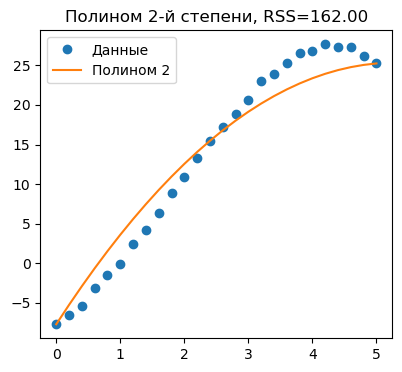

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(x_data, y_data, 'o', label='Данные')
plt.plot(x_data, y_pred_2, '-', label='Полином 2')
plt.legend()
plt.title(f'Полином 2-й степени, RSS={rss_2:.2f}')

6. Повторите шаги 1-5 для полинома 3й степени (для этого нужно будет выбрать 4 точки).

In [66]:
indices_3 = [0, 8, 17, 25]
x_points_3 = x_data[indices_3]
y_points_3 = y_data[indices_3]

A3 = np.array([[x**3, x**2, x, 1] for x in x_points_3])
coeffs_3 = solve(A3, y_points_3)

In [ ]:
y_pred_3 = coeffs_3[0]*x_data**3 + coeffs_3[1]*x_data**2 + coeffs_3[2]*x_data + coeffs_3[3]
rss_3 = np.sum((y_data - y_pred_3)**2)
print(f'RSS полинома 3-й степени: {rss_3:.2f}')

RSS полинома 3-й степени: 1.95


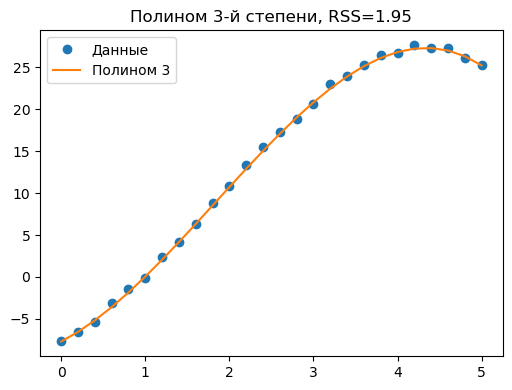

In [68]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 2)
plt.plot(x_data, y_data, 'o', label='Данные')
plt.plot(x_data, y_pred_3, '-', label='Полином 3')
plt.legend()
plt.title(f'Полином 3-й степени, RSS={rss_3:.2f}')
plt.tight_layout()
plt.show()

In [69]:
profit_6 = coeffs_3[0]*6**3 + coeffs_3[1]*6**2 + coeffs_3[2]*6 + coeffs_3[3]
profit_8 = coeffs_3[0]*8**3 + coeffs_3[1]*8**2 + coeffs_3[2]*8 + coeffs_3[3]
print(f'Прибыль при скидке 6%: {profit_6:.2f}')
print(f'Прибыль при скидке 8%: {profit_8:.2f}')

Прибыль при скидке 6%: 12.52
Прибыль при скидке 8%: -60.34


In [70]:
# График предсказаний
x_extended = np.linspace(0, 8, 100)
y_extended = coeffs_3[0]*x_extended**3 + coeffs_3[1]*x_extended**2 + coeffs_3[2]*x_extended + coeffs_3[3]

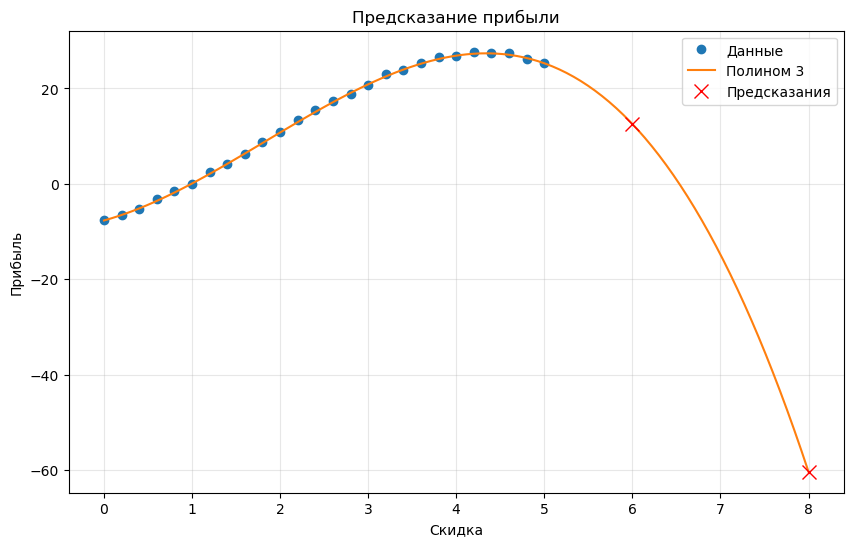

In [71]:
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, 'o', label='Данные')
plt.plot(x_extended, y_extended, '-', label=f'Полином {3}')
plt.plot([6, 8], [profit_6, profit_8], 'rx', markersize=10, label='Предсказания')
plt.legend()
plt.xlabel('Скидка')
plt.ylabel('Прибыль')
plt.title('Предсказание прибыли')
plt.grid(True, alpha=0.3)
plt.show()